In [1]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [2]:
# Replace these variables accordingly 
path_to_results1 = "../experiments/2018-10-11-15-52_PowerM_/"
path_to_results2 = "../experiments/2018-10-11-16-35_PowerN_/"

In [3]:
data = pandas.read_csv(path_to_results1 + "PowerM.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [4]:
selectedCategories = ['i', 'zi', 'ho', 'st', 'si_1.0', 'cr', 'hcg', 'hc',
       'l', 'hs', 'dl_0.25', 'si_5.0', 'p_1.0']
selectedCategories = ['Linear', 'Independent', 'Sine_5', 'Sine_1', 'HyperSphere',
       'Hypercube', 'Hourglass', 'HypercubeGraph', 'Zinv', 'Parabolic_1',
       'Cross', 'Star', 'DoubleLinear_0.25']

In [5]:
selectedCategoriesDict = {
    'Linear': "L", 
    'Independent' : "I", 
    'Sine_5' : "S5", 
    'Sine_1' : "S1", 
    'HyperSphere' : "Hs",
    'Hypercube' : "Hc", 
    'Hourglass': "H", 
    'HypercubeGraph' : "HcG", 
    'Zinv' : "Zi", 
    'Parabolic_1' : "P",
    'Cross':"C", 
    'Star': "St", 
    'DoubleLinear_0.25': "Dl",
    #'l' : "L",
    #'si_1.0' : "S1", 
    #'si_5.0' : "S5", 
    #'hc' : "Hc", 
    #'dl_0.25': "Dl", 
    #"cr": "C",
    #'ho' : "H", 
    #'hs' : "Hs",
    #'p_1.0' : "P", 
    #'st' : "St",
    #'zi' : "Zi", 
    #"i" : "I",
    #'hcg' : "HcG", 
}

In [6]:
data["category"].unique()

array(['0', 'Linear', 'Independent', 'Sine_5', 'Sine_1', 'HyperSphere',
       'Hypercube', 'Hourglass', 'HypercubeGraph', 'Zinv', 'Parabolic_1',
       'Cross', 'Star', 'DoubleLinear_0.25'], dtype=object)

In [7]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData["category"] = [selectedCategoriesDict[x] for x in selectedData["category"]]

/home/fouchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
selectedCategories

['Linear',
 'Independent',
 'Sine_5',
 'Sine_1',
 'HyperSphere',
 'Hypercube',
 'Hourglass',
 'HypercubeGraph',
 'Zinv',
 'Parabolic_1',
 'Cross',
 'Star',
 'DoubleLinear_0.25']

In [9]:
data["category"].unique()

array(['0', 'Linear', 'Independent', 'Sine_5', 'Sine_1', 'HyperSphere',
       'Hypercube', 'Hourglass', 'HypercubeGraph', 'Zinv', 'Parabolic_1',
       'Cross', 'Star', 'DoubleLinear_0.25'], dtype=object)

In [11]:
selectedData1 = selectedData

In [13]:
data = pandas.read_csv(path_to_results2 + "PowerN.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData["category"] = [selectedCategoriesDict[x] for x in selectedData["category"]]

selectedData2 = selectedData

/home/fouchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [88]:
selectedData

,refId,nDim,noise,n,nRep,testId,alpha,M,powerAt90,powerAt95,...,stdContrast,avgWalltime,stdWalltime,avgCPUtime,stdCPUtime,avgPrepWalltime,stdPrepWalltime,avgPrepCPUtime,stdPrepCPUtime,category
8,Independent-3-0.0,3,0.0,100,500,MS,NaN,NaN,0.184,0.086,...,0.057852,0.131094,0.906720,0.074152,0.012772,0.020892,0.070529,0.017767,0.007034,I
9,Independent-3-0.0,3,0.0,100,500,CMI,NaN,NaN,0.088,0.034,...,0.012427,0.225250,0.027217,0.224635,0.027152,0.142759,0.341235,0.124625,0.016767,I
10,Independent-3-0.0,3,0.0,100,500,HiCS,NaN,NaN,0.078,0.024,...,0.014918,0.431434,0.112998,0.422434,0.057138,0.200693,1.623723,0.117265,0.017815,I
11,Independent-3-0.0,3,0.0,100,500,TC,NaN,NaN,0.218,0.084,...,0.105452,0.985064,1.605773,0.816274,0.098456,0.020604,0.064423,0.017739,0.007177,I
12,Cross-3-0.0,3,0.0,100,500,MWP,0.5,50.0,1.000,1.000,...,0.016062,0.403356,1.247747,0.291219,0.249581,0.610902,2.073620,0.347950,0.358730,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12923,Sine_5-3-1.0,3,1.0,1000,500,II,NaN,NaN,0.524,0.252,...,0.077856,30.934758,14.713060,29.643603,5.689779,0.239207,1.014239,0.174819,0.057689,S5
12924,DoubleLinear_0.25-3-1.0,3,1.0,1000,500,MAC,NaN,NaN,0.102,0.054,...,0.002324,188.782414,51.054253,179.393565,21.952013,1.205851,4.586840,1.000743,0.046327,Dl
12925,Star-3-1.0,3,1.0,1000,500,MAC,NaN,NaN,0.100,0.056,...,0.001941,170.115889,50.979530,164.860697,17.687835,1.009060,1.227633,0.953920,0.052383,St
12926,HyperSphere-3-1.0,3,1.0,1000,500,MAC,NaN,NaN,0.096,0.050,...,0.014438,167.980169,46.396463,164.003552,15.248958,1.219275,5.790227,0.960045,0.046060,Hs


## Figure 5: Power of MWP w.r.t. n and M

<IPython.core.display.Javascript object>


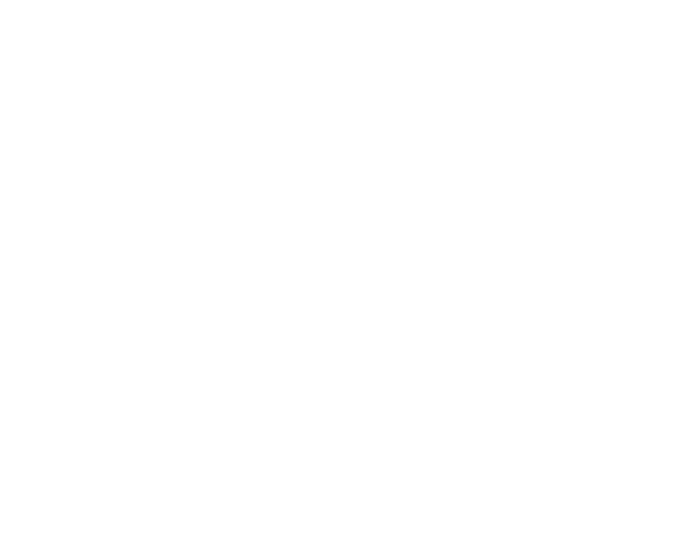

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


IndexError: list assignment index out of range

In [18]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.515, .02, 0.425])
cbar_ax2 = fig.add_axes([.91, 0.055, .02, 0.43])
test = "MWP"
measure = "avgContrast"

for i, N in enumerate([100,200,500,1000]):
    subdata = selectedData2[(selectedData2["testId"] == test) & (selectedData2["n"] == N) & (selectedData2["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0.5, vmax=1.0,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'$n = %s$'%(N))
    ax.set_ylabel("")

    ax.set_xlabel(r'')
    if i == 0:
        ax.set_ylabel(r'avg')
        
measure = "powerAt95"

for i, N in enumerate([100,200,500,1000]):
    subdata = selectedData2[(selectedData2["testId"] == test) & (selectedData2["n"] == N) & (selectedData2["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+4]
    
    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0.0, vmax=1.0,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'')
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)

    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel(r'power')

plt.tight_layout(rect=[0, 0, .9, 1])

#fig.savefig("plots/Fig5_1.pdf")

<IPython.core.display.Javascript object>


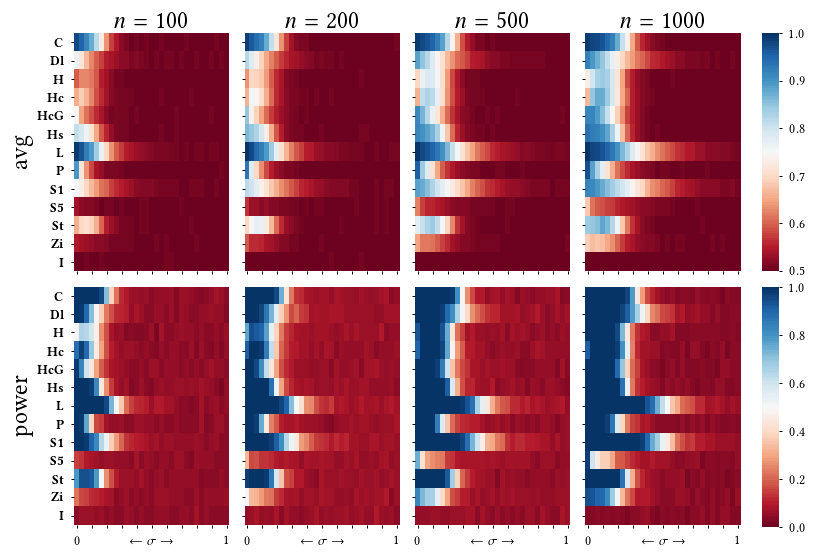

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [93]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.515, .02, 0.425])
cbar_ax2 = fig.add_axes([.91, 0.055, .02, 0.43])
test = "MWP"
measure = "avgContrast"

for i, N in enumerate([100,200,500,1000]):
    subdata = selectedData2[(selectedData2["testId"] == test) & (selectedData2["n"] == N) & (selectedData2["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0.5, vmax=1.0,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'$n = %s$'%(N))
    ax.set_ylabel("")

    ax.set_xlabel(r'')
    if i == 0:
        ax.set_ylabel(r'avg')
        
measure = "powerAt95"

for i, N in enumerate([100,200,500,1000]):
    subdata = selectedData2[(selectedData2["testId"] == test) & (selectedData2["n"] == N) & (selectedData2["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+4]
    
    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0.0, vmax=1.0,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'')
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels, rotation=0)

    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel(r'power')

plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig5_1-2.pdf")

<IPython.core.display.Javascript object>


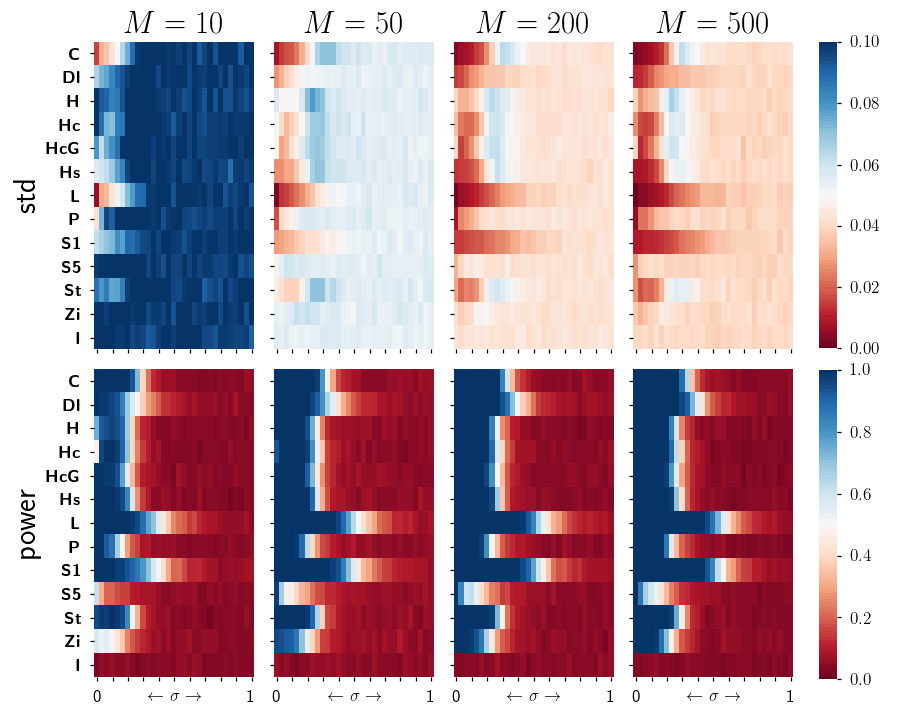

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [10]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.515, .02, 0.425])
cbar_ax2 = fig.add_axes([.91, 0.055, .02, 0.43])
test = "MWP"



measure = "stdContrast"
for i, M in enumerate([10,50,200,500]):
    subdata = selectedData1[(selectedData1["testId"] == test) & (selectedData1["M"] == M) & (selectedData1["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]

    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0, vmax=0.10,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'$M = %s$'%(M))

    ax.set_ylabel("")
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)
    if i == 0:
        ax.set_ylabel(r'std')
    ax.set_xlabel(r'')

                         
measure = "powerAt95"

for i, M in enumerate([10,50,200,500]):
    subdata = selectedData1[(selectedData1["testId"] == test) & (selectedData1["M"] == M) & (selectedData1["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+4]

    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0, vmax=1,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'')

    ax.set_ylabel("")

    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel(r'power')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig5_2.pdf")

<IPython.core.display.Javascript object>


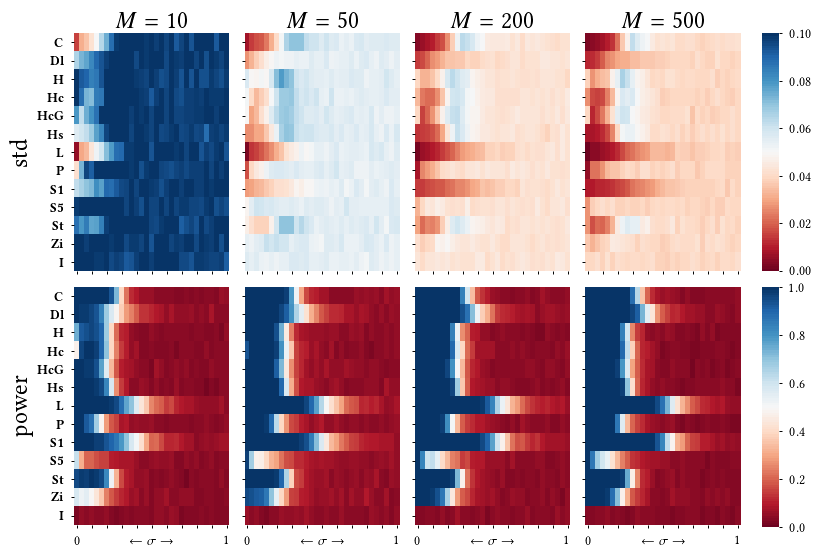

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [14]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.515, .02, 0.425])
cbar_ax2 = fig.add_axes([.91, 0.055, .02, 0.43])
test = "MWP"



measure = "stdContrast"
for i, M in enumerate([10,50,200,500]):
    subdata = selectedData1[(selectedData1["testId"] == test) & (selectedData1["M"] == M) & (selectedData1["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]

    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0, vmax=0.10,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'$M = %s$'%(M))

    ax.set_ylabel("")
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)
    if i == 0:
        ax.set_ylabel(r'std')
    ax.set_xlabel(r'')

                         
measure = "powerAt95"

for i, M in enumerate([10,50,200,500]):
    subdata = selectedData1[(selectedData1["testId"] == test) & (selectedData1["M"] == M) & (selectedData1["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+4]

    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0, vmax=1,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'')

    ax.set_ylabel("")

    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels, rotation=0)
    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel(r'power')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig5_2-2.pdf")